In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

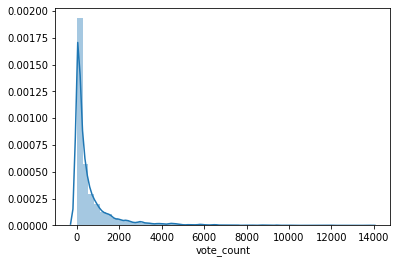

In [2]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
sns.distplot(df["vote_count"])#正規分布

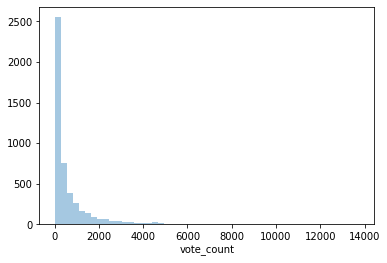

In [3]:
sns.distplot(df["vote_count"], kde = False, norm_hist = False)

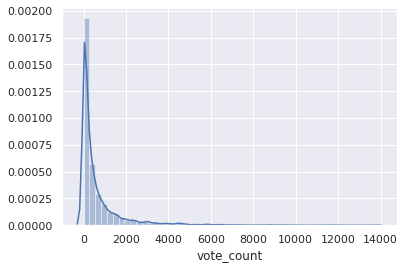

In [4]:
sns.set()
sns.distplot(df['vote_count'])

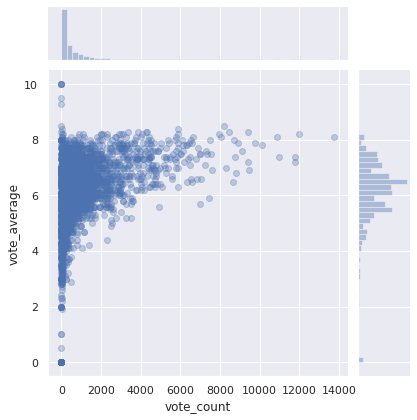

In [5]:
sns.jointplot(x = "vote_count", y = "vote_average", data = df, alpha = 0.3)

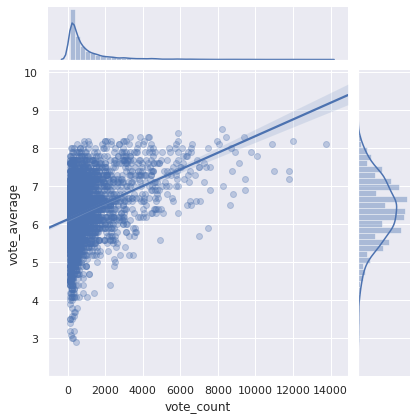

In [6]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
df = df[(df['vote_count'] > 100)]
sns.jointplot(x = "vote_count", y = "vote_average", data =df, kind = "reg", joint_kws={"scatter_kws": {"alpha": 0.3}})

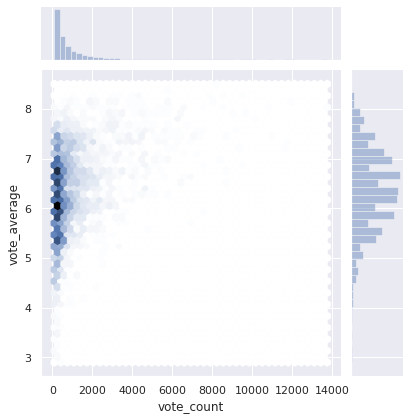

In [7]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
df = df[(df['vote_count'] > 100)]
sns.jointplot(x = "vote_count", y = "vote_average", data =df, kind = "hex" )

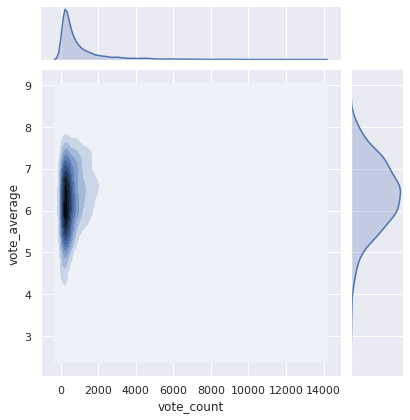

In [8]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
df = df[(df['vote_count'] > 100)]
sns.jointplot(x = "vote_count", y = "vote_average", data =df, kind = "kde")

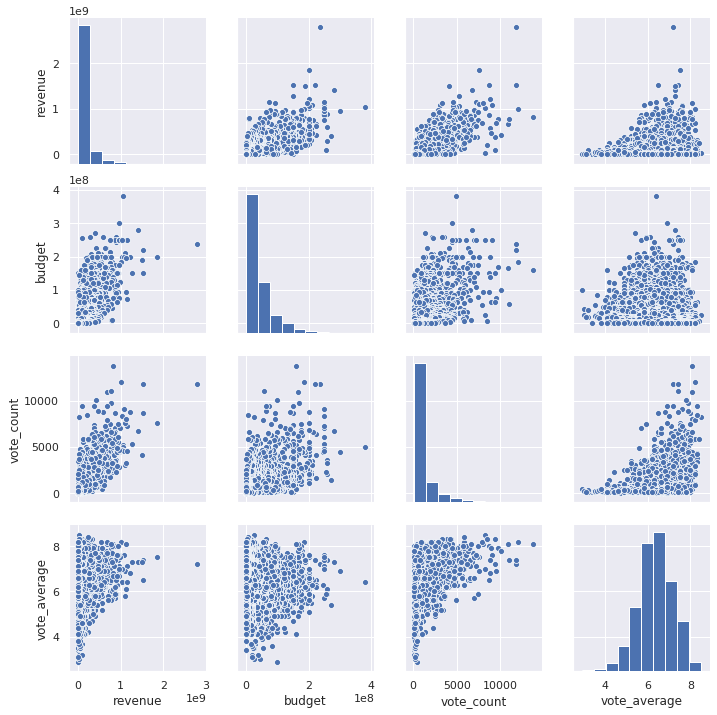

In [9]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

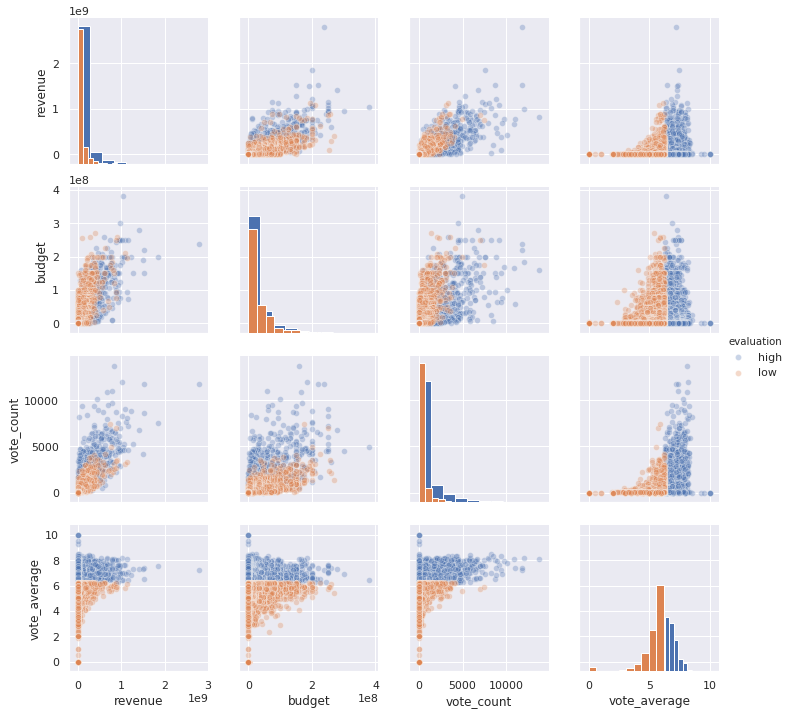

In [10]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
vote_average_median = df["vote_average"].median()
df["evaluation"] = df["vote_average"].apply(lambda x : "high" if x > vote_average_median else "low")
sns.pairplot(df[["revenue", "budget", "vote_count", "vote_average", "evaluation"]], 
             hue = "evaluation", 
             plot_kws={"alpha":0.3},
             diag_kind='hist'
)

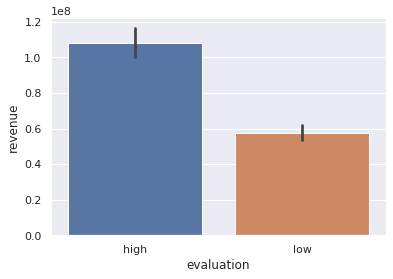

In [14]:
sns.barplot(x = 'evaluation', y = 'revenue', data = df)
#デフォルトで平均値が棒グラフで表示
#黒線は母集団で計算した際に９５％の確率で（今回は）平均値が、棒の範囲に収まるということ

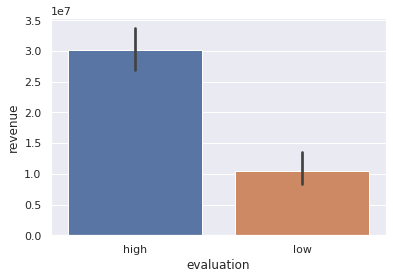

In [15]:
#estimatorを使用して表示する関数を変更
sns.barplot(x = 'evaluation', y = 'revenue', data = df,
            estimator = np.median)

In [20]:
df = df.dropna(subset = ["release_date"])
df['year'] = df['release_date'].apply(lambda x: x[:4])

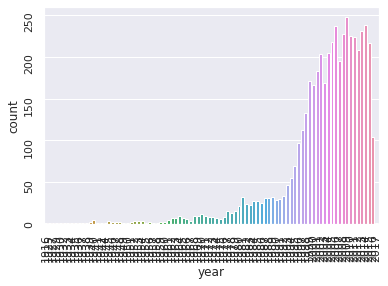

In [23]:
ax = sns.countplot(x = 'year', data = df)
ax.tick_params(rotation=90)

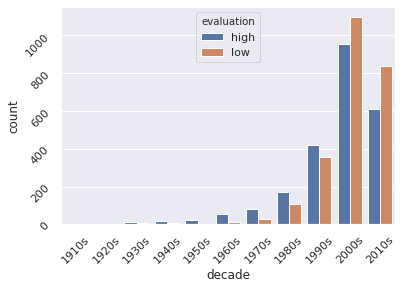

In [33]:
df["decade"] = df["release_date"].apply(lambda x: x[:3] + "0s")
ax = sns.countplot(x = 'decade', data = df.sort_values("decade"), 
                  hue = "evaluation")
ax.tick_params(rotation=45)

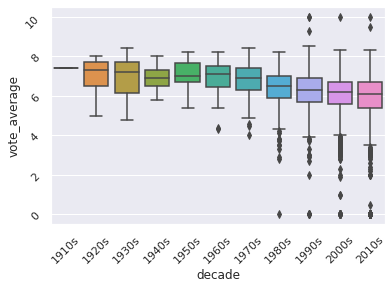

In [41]:
ax = sns.boxplot(x = "decade", y = "vote_average",
                 data = df.sort_values('decade'))
ax.tick_params(rotation=45)

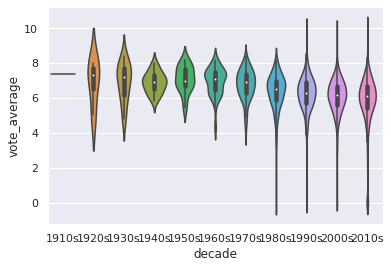

In [43]:
#各箱ヒゲ図の分布を見るとができる（しかしデータの個数を確認することができない）
sns.violinplot(x = 'decade', y = "vote_average", data = df.sort_values('decade'))

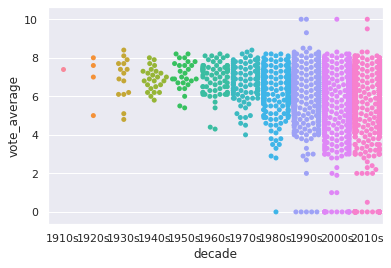

In [46]:
sns.swarmplot(x = 'decade', y = 'vote_average',
              data = df.sort_values('decade'), 
            )

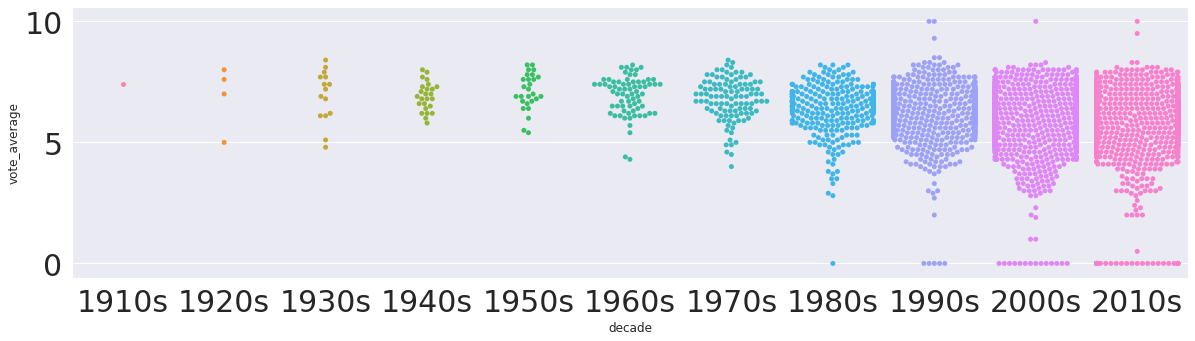

In [47]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(labelsize=30)
sns.swarmplot(ax=ax, x='decade',y='vote_average',
              data=df.sort_values('decade'))

In [55]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
df = df[(df != 0).all(axis=1)]
df = df[['budget', 'revenue', 'popularity', 'runtime', 'vote_count', 'vote_average']]
corr = df.corr()
corr

,budget,revenue,popularity,runtime,vote_count,vote_average
budget,1.000000,0.705306,0.431744,0.229712,0.539997,-0.035757
revenue,0.705306,1.000000,0.602122,0.233236,0.756143,0.188014
popularity,0.431744,0.602122,1.000000,0.182388,0.749005,0.288189
runtime,0.229712,0.233236,0.182388,1.000000,0.258101,0.386199
vote_count,0.539997,0.756143,0.749005,0.258101,1.000000,0.380825
vote_average,-0.035757,0.188014,0.288189,0.386199,0.380825,1.000000


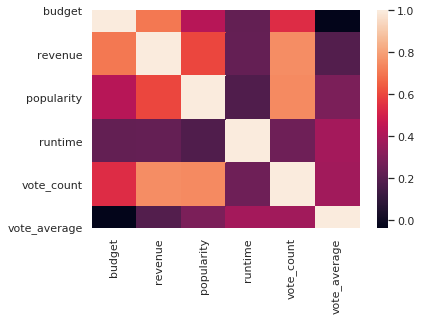

In [56]:
sns.heatmap(corr)

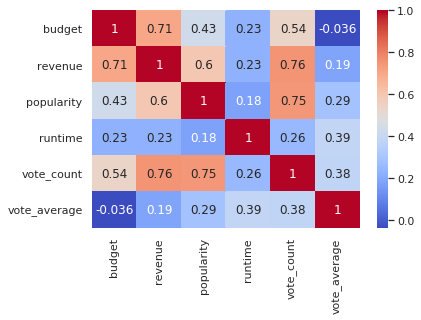

In [61]:
fig, ax =plt.subplots()
sns.heatmap(corr, cmap="coolwarm", annot=True)
ax.set_ylim(6, 0)#データが切れる場合は以下の関数に要素の個数を入力
plt.show()

In [66]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df = df.dropna(subset = ["release_date"])
df['year'] = df["release_date"].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])

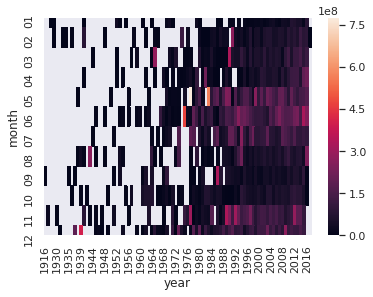

In [67]:
revenue_df = df.groupby(["year", "month"]).mean()[["revenue"]].pivot_table(
index='month', columns='year', values="revenue")
sns.heatmap(revenue_df)